<a href="https://colab.research.google.com/github/Harsh-Gupta9897/MachineLearning/blob/master/Hand_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Written digit recognition

In [0]:
import torch 
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F

In [0]:
dataset = MNIST(root='data/',download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
len(dataset)

60000

In [0]:
dataset[4][1]

9

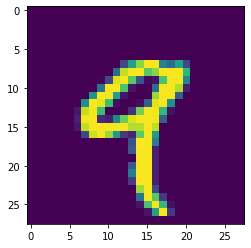

In [0]:
plt.imshow(dataset[4][0])

In [0]:
test_dataset = MNIST(root='data/',train=False)

In [0]:
len(test_dataset)

10000

Label: 5


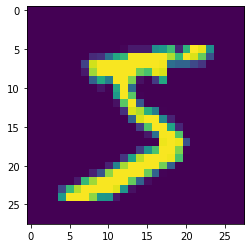

In [0]:
image, label = dataset[0]
plt.imshow(image)
print('Label:',label)

In [0]:
import torchvision.transforms as transforms

In [0]:
dataset = MNIST(root='data/',transform = transforms.ToTensor())

In [0]:
image_tensor ,label = dataset[0]

In [0]:
print(image_tensor.shape)

torch.Size([1, 28, 28])


In [0]:
print(image_tensor[:,10:20,10:20])
print(torch.max(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824, 0.6275, 0.4235, 0.0039,
          0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412, 0.9922, 0.9922, 0.4667,
          0.0980, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.1765, 0.7294, 0.9922, 0.9922,
          0.5882, 0.1059],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0627, 0.3647, 0.9882,
          0.9922, 0.7333],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9765,
          0.9922, 0.9765],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.1804, 0.5098, 0.7176, 0.9922,
          0.9922, 0.8118],
         [0.0000, 0.0000, 0.1529, 0.5804, 0.8980, 0.9922, 0.9922, 0.9922,
          0.9804,

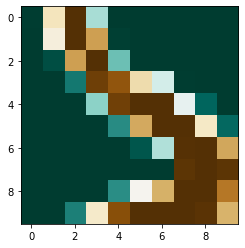

In [0]:
plt.imshow(image_tensor[0,10:20,10:20],cmap='BrBG_r')

In [0]:
import numpy as np

In [0]:
def split_indices(n,val_pct):
    n_val = int(val_pct*n)
    idxs = np.random.permutation(n)
    return idxs[n_val:] ,idxs[:n_val]
    

In [0]:
split_indices(60000,0.2)

(array([49315, 43636,  2265, ..., 24609, 51564,  8239]),
 array([ 6953, 44343, 58419, ..., 30989, 13657, 13080]))

In [0]:
train_indices ,val_indices = split_indices(len(dataset),0.2)

In [0]:
train_indices.shape

(48000,)

In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [0]:
batch_size =100
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,batch_size,sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,batch_size,sampler=val_sampler)

In [0]:
train_loader

In [0]:
input_size = 28*28
num_classes =10
#Logistic regression Model
model =  nn.Linear(input_size,num_classes)
print(model.weight.shape)

torch.Size([10, 784])


In [0]:
for images ,labels in train_loader:
    print(labels) 
    print(images.shape)
   # outputs = model(images)
    break

tensor([6, 7, 5, 0, 3, 6, 8, 0, 4, 8, 4, 6, 0, 3, 0, 6, 0, 8, 1, 8, 2, 6, 7, 3,
        9, 0, 8, 0, 8, 7, 7, 1, 7, 4, 2, 4, 1, 6, 7, 8, 0, 9, 4, 5, 4, 4, 5, 0,
        9, 9, 0, 2, 7, 0, 9, 6, 3, 7, 3, 1, 5, 5, 6, 7, 5, 5, 6, 8, 9, 3, 6, 7,
        3, 5, 7, 5, 6, 8, 4, 8, 4, 3, 9, 6, 1, 7, 8, 6, 9, 5, 3, 8, 7, 5, 4, 3,
        8, 2, 0, 6])
torch.Size([100, 1, 28, 28])


In [0]:
#To reshape the model inputs and add linear layer of input_size and num_classes
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
model = MnistModel()

In [0]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784])
torch.Size([10])


[Parameter containing:
 tensor([[-0.0031,  0.0197,  0.0221,  ...,  0.0233,  0.0112, -0.0327],
         [-0.0316, -0.0234, -0.0246,  ...,  0.0355, -0.0355,  0.0297],
         [ 0.0329, -0.0086,  0.0128,  ..., -0.0138,  0.0098,  0.0165],
         ...,
         [ 0.0200,  0.0151, -0.0131,  ..., -0.0296,  0.0062,  0.0053],
         [-0.0321, -0.0094,  0.0324,  ...,  0.0039, -0.0009,  0.0265],
         [ 0.0160,  0.0255, -0.0059,  ..., -0.0034,  0.0318, -0.0237]],
        requires_grad=True), Parameter containing:
 tensor([-0.0200,  0.0220,  0.0205, -0.0066, -0.0096,  0.0284,  0.0162,  0.0091,
         -0.0187, -0.0335], requires_grad=True)]

In [0]:
for images,labels in train_loader:
    outputs = model(images)
    break
outputs.shape
outputs

tensor([[-2.3183e-01,  2.5606e-02, -1.6200e-03,  5.5915e-02, -8.1933e-02,
         -1.9922e-01,  1.7170e-01,  4.3327e-02,  5.9919e-02,  7.4960e-02],
        [-4.8635e-02,  2.2739e-01, -1.0606e-02, -1.8538e-02,  1.0549e-01,
         -2.2318e-02,  8.2267e-02, -1.2785e-01,  4.2300e-02, -4.8925e-03],
        [-5.2207e-01, -6.0492e-02,  7.7006e-02, -1.8803e-01,  3.4577e-02,
          1.5206e-02,  3.0143e-01, -3.0654e-03, -3.3542e-01,  2.5065e-01],
        [-3.8156e-01,  6.1514e-02,  2.9408e-01, -1.1829e-01, -1.0448e-01,
         -3.3013e-01,  2.9748e-02, -5.0072e-02, -1.2297e-01, -4.2717e-02],
        [-7.7722e-02,  1.6866e-02, -2.2859e-01, -2.6202e-01,  1.0272e-01,
         -8.3989e-02, -1.6072e-01, -1.5874e-01,  3.0501e-02,  4.2922e-02],
        [-1.1943e-01, -8.1246e-03, -4.9414e-02, -1.4497e-01, -1.0203e-01,
         -1.6685e-01,  4.5879e-02,  9.6074e-03,  3.5221e-02,  1.1619e-01],
        [-3.0165e-01,  1.2945e-01, -1.3110e-01, -2.9738e-01,  8.3352e-02,
         -4.6506e-01, -1.1136e-0

In [0]:
probs = F.softmax(outputs,dim=1)
print(probs[:2])
print('sum:' ,torch.sum(probs[2]).item())

tensor([[0.0794, 0.1027, 0.1000, 0.1059, 0.0923, 0.0820, 0.1189, 0.1046, 0.1063,
         0.1079],
        [0.0927, 0.1222, 0.0963, 0.0956, 0.1082, 0.0952, 0.1057, 0.0857, 0.1016,
         0.0969]], grad_fn=<SliceBackward>)
sum: 1.0000001192092896


In [0]:
max_probs ,preds  =  torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([6, 1, 6, 2, 4, 9, 9, 4, 5, 4, 4, 5, 0, 2, 9, 6, 2, 9, 9, 1, 4, 9, 1, 4,
        5, 1, 2, 6, 6, 4, 1, 9, 1, 9, 9, 9, 2, 7, 2, 2, 6, 6, 9, 1, 6, 2, 9, 1,
        8, 9, 5, 7, 5, 1, 4, 2, 6, 9, 6, 9, 9, 2, 9, 8, 9, 2, 6, 2, 9, 9, 6, 9,
        1, 2, 4, 2, 6, 9, 6, 1, 6, 2, 9, 4, 4, 4, 9, 1, 1, 9, 2, 1, 1, 6, 1, 4,
        5, 9, 2, 8])
tensor([0.1189, 0.1222, 0.1373, 0.1425, 0.1190, 0.1163, 0.1262, 0.1213, 0.1210,
        0.1236, 0.1326, 0.1222, 0.1160, 0.1215, 0.1365, 0.1306, 0.1200, 0.1328,
        0.1228, 0.1306, 0.1326, 0.1150, 0.1150, 0.1295, 0.1314, 0.1325, 0.1318,
        0.1234, 0.1174, 0.1207, 0.1423, 0.1445, 0.1228, 0.1463, 0.1293, 0.1426,
        0.1281, 0.1149, 0.1267, 0.1153, 0.1292, 0.1301, 0.1452, 0.1317, 0.1410,
        0.1192, 0.1453, 0.1171, 0.1233, 0.1190, 0.1242, 0.1545, 0.1288, 0.1289,
        0.1385, 0.1240, 0.1365, 0.1538, 0.1267, 0.1315, 0.1619, 0.1247, 0.1159,
        0.1078, 0.1179, 0.1166, 0.1132, 0.1192, 0.1518, 0.1336, 0.1185, 0.1237,
        0.1162, 0.1

In [0]:
print(labels)

tensor([2, 9, 9, 2, 6, 1, 2, 4, 9, 6, 9, 6, 1, 7, 0, 3, 2, 5, 1, 8, 9, 1, 1, 9,
        4, 3, 4, 6, 7, 6, 8, 0, 5, 2, 0, 6, 9, 1, 7, 9, 4, 7, 0, 8, 2, 7, 6, 1,
        8, 1, 7, 2, 2, 8, 0, 4, 0, 0, 6, 3, 2, 5, 1, 1, 1, 9, 6, 9, 6, 8, 2, 4,
        7, 7, 9, 5, 6, 4, 6, 1, 6, 2, 7, 0, 6, 9, 2, 1, 5, 5, 8, 8, 3, 0, 3, 9,
        4, 1, 3, 8])


# Enhance model performance by gradient 

In [0]:
torch.sum(labels == preds)

tensor(16)

In [0]:
torch.sum(labels == preds).item()

16

In [0]:
def accuracy(labels,preds):
    return torch.sum(labels == preds).item()/len(labels)

In [0]:
accuracy(labels,preds)

0.16

In [0]:
loss_fn = F.cross_entropy

In [0]:
#Loss

In [0]:
loss = loss_fn(outputs,labels)
loss

tensor(2.3099, grad_fn=<NllLossBackward>)

In [0]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [0]:
#Main function
def loss_batch(model,loss_func ,xb,yb,opt=None,metric=None):
    preds = model(xb)
    loss = loss_func(preds,yb)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_result = None
    
    if metric is not None:
        metric_result = metric(preds,yb)
    
    return loss.item(),len(xb),metric_result
        

In [0]:
#for validation set
def evaluate(model,loss_fn ,valid_dl,metric=None):
    with torch.no_grad():
        #pass each batch through model
        results = [loss_batch(model ,loss_fn,xb ,yb,metric=metric) 
                   for xb,yb in valid_dl ]
        #separate losses,counts and metrices
        losses,nums,metrics = zip(*results)
        #total size of dataset
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses,nums))/total
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics,nums))/total
        return avg_loss ,total ,avg_metric

In [0]:
def accuracy(outputs,labels):
    _,preds = torch.max(outputs ,dim=1)
    return torch.sum(preds==labels).item()/len(preds)

In [0]:
val_loss, total,val_acc = evaluate(model,loss_fn,val_loader,metric=accuracy)
print('Loss:{:.4f},accuracy:{:.4f}'.format(val_loss,val_acc))

Loss:2.3284,accuracy:0.1252


In [0]:
def fit(epochs, model, loss_fn, opt, train_dl , valid_dl, metric=None):
    for epoch in range(epochs):
        #training
        for xb,yb in train_dl:
            loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
        #evaluation
        result = evaluate(model,loss_fn,valid_dl,metric)
        val_loss,total,val_metric = result
    if metric is None:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1 ,epochs,val_loss))
    else:
        print('Epoch [{}/{}], Loss: {:.4f},{}:{:.4f}'.format(epoch+1 ,epochs,val_loss,metric.__name__,val_metric))


In [0]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)


In [0]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [5/5], Loss: 1.1002,accuracy:0.8099


In [46]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)


Epoch [5/5], Loss: 0.8087,accuracy:0.8363


In [47]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)


Epoch [5/5], Loss: 0.6840,accuracy:0.8517


In [48]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)


Epoch [5/5], Loss: 0.6135,accuracy:0.8597


In [49]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)


Epoch [5/5], Loss: 0.5675,accuracy:0.8664


In [50]:
fit(50,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)


Epoch [50/50], Loss: 0.4176,accuracy:0.8888


In [0]:
test_dataset = MNIST(root='data/',train=False ,transform =transforms.ToTensor())

torch.Size([1, 28, 28])


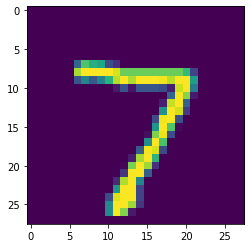

In [54]:
img , label = test_dataset[0]
plt.imshow(img[0])
print(img.shape)

In [58]:
# to add batch no
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [0]:
def predict_image(img,model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _,preds = torch.max(yb,dim=1)
  return preds[0].item()

Label: 7 ,Predicted: 7


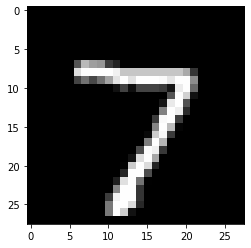

In [64]:
img ,label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:',predict_image(img,model))

Label: 3 ,Predicted: 3


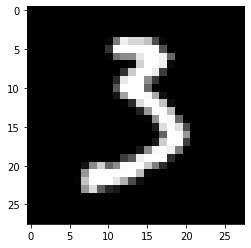

In [65]:
img ,label = test_dataset[230]
plt.imshow(img[0],cmap='gray')
print('Label:',label,',Predicted:',predict_image(img,model))